Import the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
#Load the dataset
data = pd.read_csv("retail_sales_dataset.csv")

In [3]:
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
print("Last 5 rows of the dataset:")
data.tail()

Last 5 rows of the dataset:


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [5]:
print(f'Dataset have {data.shape[0]} rows and {data.shape[1]} columns')

Dataset have 1000 rows and 9 columns


In [6]:
print("Information about the dataset:")
data.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Check missing values

In [7]:
missing_values = data.isnull().sum()
print("Missing values in each column: ")
print(missing_values)

Missing values in each column: 
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


OBSERVATION: no missing values

In [8]:
# Check for duplicate rows in the dataset

duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows: ", duplicate_rows)

Number of duplicate rows:  0


 Descriptive Statistics

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,41.392,13.681430,18.0,29.00,42.0,53.00,64.0
Quantity,1000.0,2.514,1.132734,1.0,1.00,3.0,4.00,4.0
Price per Unit,1000.0,179.890,189.681356,25.0,30.00,50.0,300.00,500.0
Total Amount,1000.0,456.000,559.997632,25.0,60.00,135.0,900.00,2000.0


Time series Analysis

In [10]:
# Assuming the dataset has a date/time column, convert it to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as the index of the DataFrame
#data.set_index('Date', inplace=True)


In [11]:
# change gender data type
data['Gender'] = data['Gender'].astype('category')

In [12]:
# change product_category data type
data['Product Category'] = data['Product Category'].astype('category')

In [13]:
data.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                    category
Age                          int64
Product Category          category
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [14]:
temp = data.copy()

In [15]:
temp['Date'].describe()

count                             1000
mean     2023-07-03 00:25:55.200000256
min                2023-01-01 00:00:00
25%                2023-04-08 00:00:00
50%                2023-06-29 12:00:00
75%                2023-10-04 00:00:00
max                2024-01-01 00:00:00
Name: Date, dtype: object

In [16]:
# gender column frequency
gender_counts = temp['Gender'].value_counts()
print(gender_counts)

Gender
Female    510
Male      490
Name: count, dtype: int64


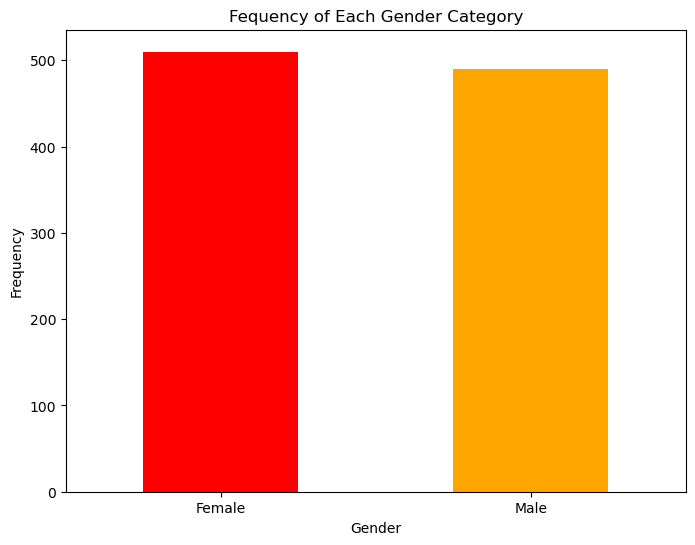

In [17]:
# Plotting the frequency of each gender category with different colors for bars
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['red', 'orange'])  
plt.title('Fequency of Each Gender Category')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  
plt.show()

In [18]:
# frequency of product_category
product_counts = temp['Product Category'].value_counts()
print(product_counts)

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


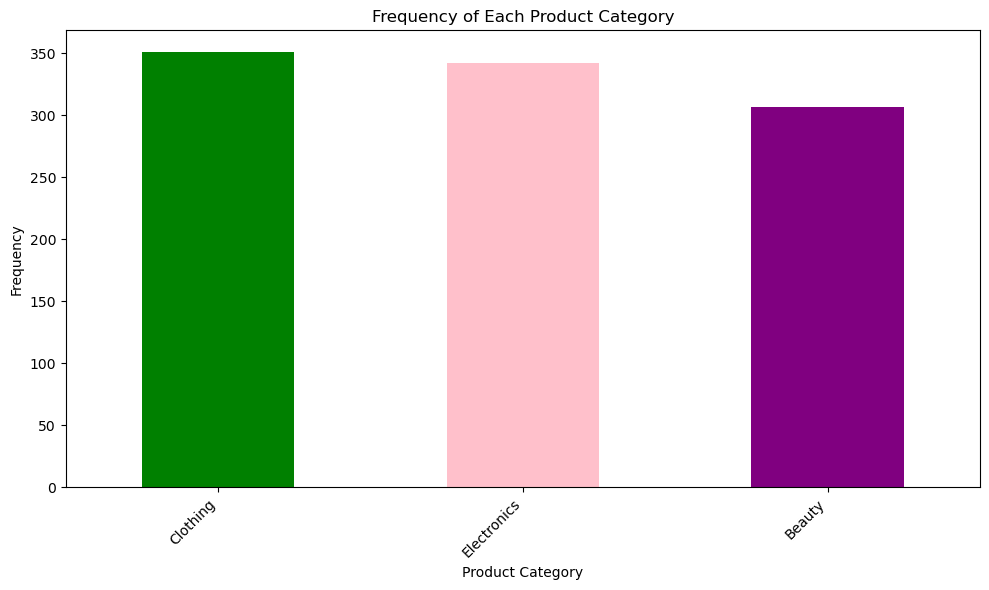

In [19]:

#data['Product Category'].value_counts().plot(kind='bar', color='purple')


colors = ['green', 'pink', 'purple']  

# Plotting the frequency of each product category with different colors for bars
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar', color=colors) 
plt.title('Frequency of Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [20]:
# Set the 'Date' column as the index of the DataFrame
data.set_index('Date', inplace=True)

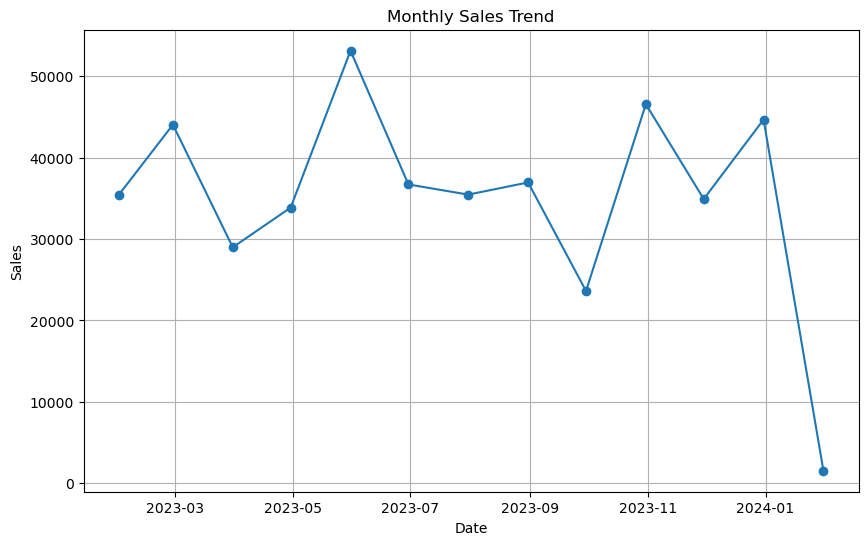

In [21]:
# Resample the data to monthly frequency and sum the total amount for each month
monthly_sales = data['Total Amount'].resample('M').sum()

# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [22]:
#Customer Analysis

# Group the data by Customer_ID
customer_grouped = data.groupby('Customer ID')

# Calculate average age and gender distribution
customer_demographics = customer_grouped.agg({'Age': 'mean', 'Gender': pd.Series.mode})

In [23]:
#Product Analysis

# Group the data by Product_ID
product_grouped = data.groupby('Product Category')

# Compute statistics for each product
product_analysis = product_grouped.agg({'Transaction ID': 'count', 'Total Amount': ['mean', 'sum']})

# Rename columns for better readability
product_analysis.columns = ['Purchase Count', 'Average Sales', 'Total Sales']

In [24]:
print("Customer Demographics and Purchasing Behavior:\n")
print("Average Age and Gender Distribution:")
print(customer_demographics)
print("\nProduct Analysis:")
print(product_analysis)

Customer Demographics and Purchasing Behavior:

Average Age and Gender Distribution:
              Age  Gender
Customer ID              
CUST001      34.0    Male
CUST002      26.0  Female
CUST003      50.0    Male
CUST004      37.0    Male
CUST005      30.0    Male
...           ...     ...
CUST995      41.0  Female
CUST996      62.0    Male
CUST997      52.0    Male
CUST998      23.0  Female
CUST999      36.0  Female

[1000 rows x 2 columns]

Product Analysis:
                  Purchase Count  Average Sales  Total Sales
Product Category                                            
Beauty                       307     467.475570       143515
Clothing                     351     443.247863       155580
Electronics                  342     458.786550       156905


Visualization

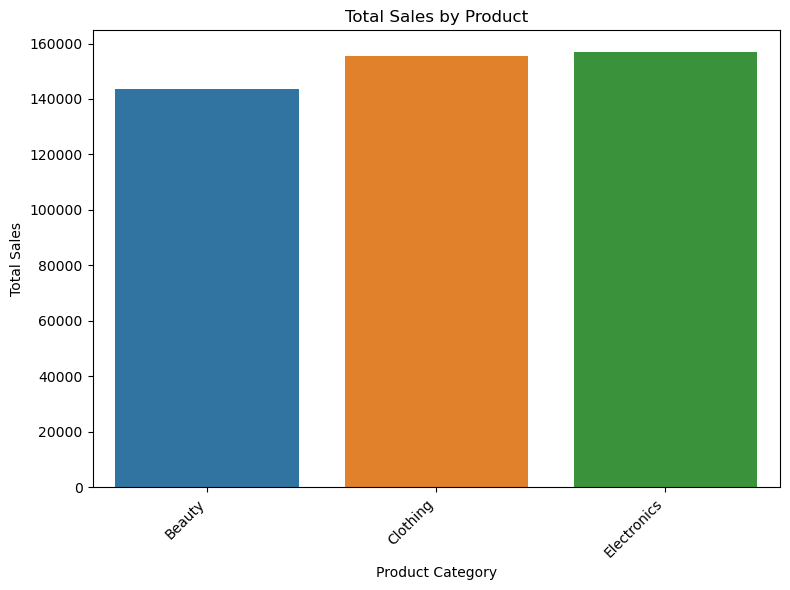

In [25]:
# Group the data by Product Category
product_grouped = data.groupby('Product Category')

# Compute total sales for each product category
total_sales_per_product = product_grouped['Total Amount'].sum().reset_index()

# Create a bar plot to visualize total sales by product
plt.figure(figsize=(8, 6))
sns.barplot(x='Product Category', y='Total Amount', data=total_sales_per_product)
plt.title('Total Sales by Product')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
temp

,Transaction ID,Date,Customer ID,Age,Product Category,Quantity,Price per Unit,Total Amount,Total Purchases,Gender_Male
0,1,2023-11-24,CUST001,34,Beauty,3,50,150,150,True
1,2,2023-02-27,CUST002,26,Clothing,2,500,1000,1000,False
2,3,2023-01-13,CUST003,50,Electronics,1,30,30,30,True
3,4,2023-05-21,CUST004,37,Clothing,1,500,500,500,True
4,5,2023-05-06,CUST005,30,Beauty,2,50,100,100,True
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,62,Clothing,1,50,50,50,True
996,997,2023-11-17,CUST997,52,Beauty,3,30,90,90,True
997,998,2023-10-29,CUST998,23,Beauty,4,25,100,100,False
998,999,2023-12-05,CUST999,36,Electronics,3,50,150,150,False


In [27]:

temp['Total Purchases'] = temp['Quantity'] * temp['Price per Unit']

# Convert Gender to numerical values using one-hot encoding
temp = pd.get_dummies(temp, columns=['Gender'], drop_first=True)

# Customer segmentation based on age, gender, and purchasing behavior
X = temp[['Age', 'Gender', 'Total Purchases']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
data['Segment'] = kmeans.labels_

# 2. Inventory Management
# Analyze product performance
top_selling_products = temp.groupby('Product')['Quantity'].sum().nlargest(5)
slow_moving_items = temp.groupby('Product')['Quantity'].sum().nsmallest(5)

KeyError: "['Gender'] not in index"